In [2]:
from xml.dom import minidom
xmldoc = minidom.parse('/network/home/barinpvi/search.xml')

itemlist = xmldoc.getElementsByTagName('place')

quebec_str = itemlist[0].attributes['polygonpoints'].value

search.xml was downloaded from https://nominatim.openstreetmap.org/search?q=Alberta,%20Canada&format=xml&polygon=1

In [38]:
#for s in itemlist:
#    print(s.attributes['polygonpoints'].value)

In [3]:
quebec_str[0:50]

'[["-120.0013835","54.9957051"],["-120.0013796","54'

In [4]:
from pyparsing import nestedExpr

In [5]:
x = nestedExpr('[',']').parseString(quebec_str).asList()

In [6]:
x = x[0]

In [7]:
xs = []
ys = []
for i in range(int(len(x)/2)):
    #print((x[i*2][0].replace("\"", "")))
    xs.append(float(x[i*2][0].replace("\"", "")))
    ys.append(float(x[i*2][2].replace("\"", "")))

In [8]:
max(xs)

-110.0047639

In [9]:
min(xs)

-120.0013835

In [10]:
max(ys)

60.0004216

In [11]:
min(ys)

48.9966667

In [12]:
import matplotlib.pyplot as plt

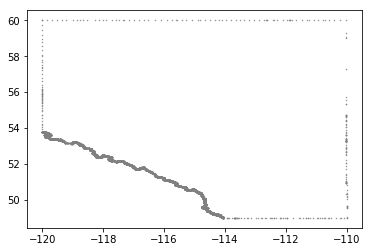

In [13]:
plt.scatter(xs, ys, s=0.2, c="grey")

Source: https://nominatim.openstreetmap.org/search?q=Alberta,%20Canada&format=xml&polygon=1

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(columns=['longitude', 'latitude'])

In [17]:
df['longitude'] = xs

In [18]:
df['latitude'] = ys

In [19]:
df.head()

,longitude,latitude
0,-120.001384,54.995705
1,-120.001380,54.925432
2,-120.001369,54.736039
3,-120.001369,54.730625
4,-120.001359,54.545626


In [20]:
df.to_csv("alberta_coordinates.csv")

In [21]:
df2 = pd.read_csv("alberta_coordinates.csv")